In [1]:
import geopandas as gpd
import pandas as pd
from pyproj import CRS
from keplergl import KeplerGl
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
# reading data
fp = r'data/penguin-tracks.geojson'
file = open(fp)
geodata = gpd.read_file(file, driver='GeoJSON')

geodata.head()

,timestamp,long,lat,comments,migration_,tag_tech_s,sensor_typ,individual,tag_ident,ind_ident,study_name,date,time,year,geometry
0,2018-01-01T00:43:00,139.74282,-66.57103,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74282 -66.57103)
1,2018-01-01T00:44:00,139.74310,-66.57141,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74310 -66.57141)
2,2018-01-01T00:45:00,139.74364,-66.57182,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74364 -66.57182)
3,2018-01-01T00:46:00,139.74420,-66.57211,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74420 -66.57211)
4,2018-01-01T00:47:00,139.74433,-66.57228,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74433 -66.57228)


In [3]:
geodata['timestamp'] = pd.to_datetime(geodata['timestamp'])
geodata['year'] = pd.DatetimeIndex(geodata['timestamp']).year
geodata['t'] = geodata['timestamp'].astype(str)

In [4]:
print('Penguins: ', geodata['tag_ident'].nunique())
print('Time period: ', geodata['timestamp'].min(), 'to ', geodata['timestamp'].max())

Penguins:  16
Time period:  2018-01-01 00:00:00 to  2018-01-11 14:24:58


In [5]:
# subset
geodata = geodata.loc[geodata['year']==2018]

In [6]:
print('Penguins: ', geodata['tag_ident'].nunique())
print('Time period: ', geodata['timestamp'].min(), 'to ', geodata['timestamp'].max())

Penguins:  16
Time period:  2018-01-01 00:00:00 to  2018-01-11 14:24:58


In [7]:
geodata.head()

,timestamp,long,lat,comments,migration_,tag_tech_s,sensor_typ,individual,tag_ident,ind_ident,study_name,date,time,year,geometry,t
0,2018-01-01 00:43:00,139.74282,-66.57103,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74282 -66.57103),2018-01-01 00:43:00
1,2018-01-01 00:44:00,139.74310,-66.57141,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74310 -66.57141),2018-01-01 00:44:00
2,2018-01-01 00:45:00,139.74364,-66.57182,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74364 -66.57182),2018-01-01 00:45:00
3,2018-01-01 00:46:00,139.74420,-66.57211,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74420 -66.57211),2018-01-01 00:46:00
4,2018-01-01 00:47:00,139.74433,-66.57228,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74433 -66.57228),2018-01-01 00:47:00


<AxesSubplot:>

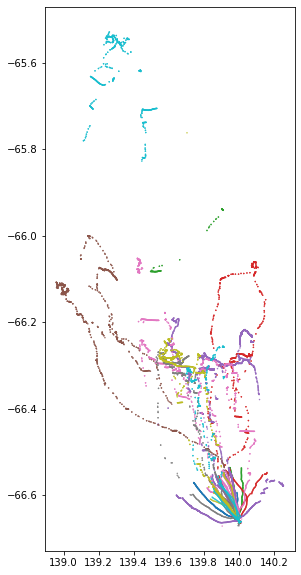

In [8]:
geodata.plot(column='ind_ident', figsize=(16,10), markersize=0.2)
# plt.axis('off')

In [9]:
geodata.crs.name

'WGS 84'

In [10]:
# create world layer
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [11]:
# define center of Orthographic Projection
lat = -90
lon = 0

ortho = CRS.from_proj4("+proj=ortho +lat_0={} +lon_0={} +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs".format(lat, lon))

<AxesSubplot:>

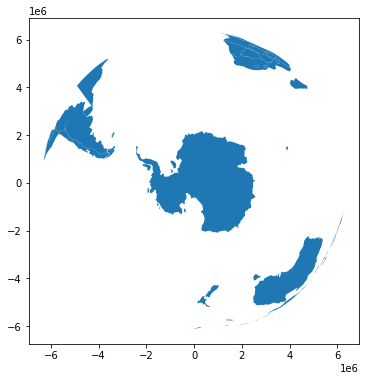

In [12]:
# Re-project and plot
geodataor = geodata.to_crs(ortho)
world = world.to_crs(ortho)
world.plot(figsize=(12,6))


In [13]:
# geodata['x'] = [xcoor.x for xcoor in geodata['geometry'].to_list()]
# geodata['y'] = [xcoor.y for xcoor in geodata['geometry'].to_list()]

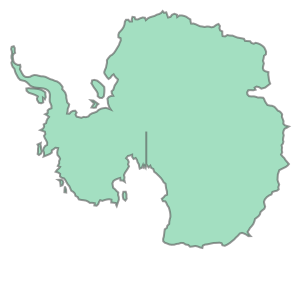

In [14]:
antarctic = list(world.loc[world['continent']=='Antarctica'].geometry)[0]
antarctic

In [15]:
bounds = antarctic.bounds
    
xmin = bounds[0]
xmax = bounds[2]

ymin = bounds[1]
ymax = bounds[3]


(-2435758.3262868873, 2569777.3556817234, -2098008.094902729, 2170137.65170231)

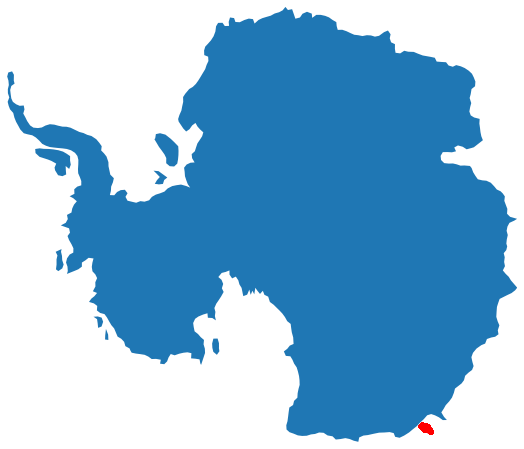

In [16]:
# create unique fig, ax
fig, ax = plt.subplots(figsize=(12, 8))

# adding layers
world.plot(ax=ax)
geodataor.plot(ax=ax, markersize=10, color='red')

# limits
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

plt.axis('off')

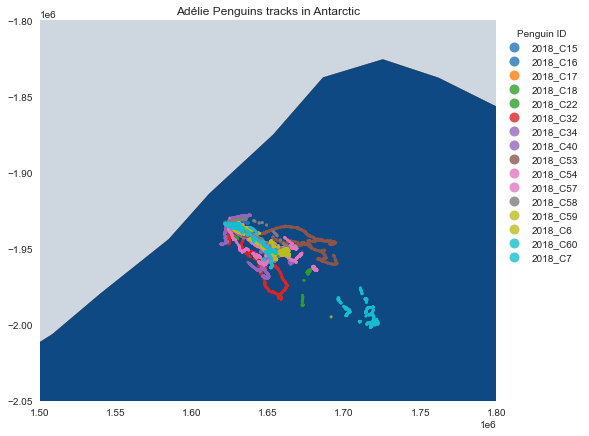

In [17]:
plt.style.use('seaborn')

# create unique fig, ax
fig, ax = plt.subplots(figsize=(10, 7))

# adding layers
world.plot(ax=ax, color='#CED7E0', edgecolor='black')
geodataor.plot(ax=ax, column = 'ind_ident', markersize=7, alpha=0.8, cmap='tab10', legend=True)

# limits
ax.set(xlim=(1500000, 1800000), ylim=(-2050000, -1800000))

# plt.axis('off')
plt.grid(False)
ax.set_facecolor('#0F4983')

plt.title('Adélie Penguins tracks in Antarctic')

ax.get_legend().set_bbox_to_anchor((1.2,1))
ax.get_legend().set_title("Penguin ID")

plt.savefig(r'png/penguin-tracks.png')

In [18]:
geodata.head()

,timestamp,long,lat,comments,migration_,tag_tech_s,sensor_typ,individual,tag_ident,ind_ident,study_name,date,time,year,geometry,t
0,2018-01-01 00:43:00,139.74282,-66.57103,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74282 -66.57103),2018-01-01 00:43:00
1,2018-01-01 00:44:00,139.74310,-66.57141,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74310 -66.57141),2018-01-01 00:44:00
2,2018-01-01 00:45:00,139.74364,-66.57182,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74364 -66.57182),2018-01-01 00:45:00
3,2018-01-01 00:46:00,139.74420,-66.57211,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74420 -66.57211),2018-01-01 00:46:00
4,2018-01-01 00:47:00,139.74433,-66.57228,2017-2018,Chick-rearing,AxyTrek,gps,None,2018_C15,2018_C15,"Adélie penguins, Sphenisciforms, foraging acti...",2021-05-20,None,2018,POINT (139.74433 -66.57228),2018-01-01 00:47:00


In [19]:
geodata = geodata[['t', 'ind_ident', 'geometry']]

In [20]:
# Create KeplerGl instance
m = KeplerGl(height=600)

# Add stop durations
m.add_data(geodata, 'Penguins')

m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Penguins': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…

In [21]:
config={
  "version": "v1",
  "config": {
    "visState": {
      "filters": [
        {
          "dataId": [
            "Penguins"
          ],
          "id": "ui3c9pzr",
          "name": [
            "t"
          ],
          "type": "timeRange",
          "value": [
            1514764800000,
            1514795331000.0002
          ],
          "enlarged": True,
          "plotType": "histogram",
          "animationWindow": "free",
          "yAxis": None
        }
      ],
      "layers": [
        {
          "id": "0ka3h8l",
          "type": "geojson",
          "config": {
            "dataId": "Penguins",
            "label": "Penguins",
            "color": [
              221,
              178,
              124
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.05,
              "strokeOpacity": 0.8,
              "thickness": 0.1,
              "strokeColor": [
                112,
                108,
                99
              ],
              "colorRange": {
                "name": "Uber Viz Qualitative 3",
                "type": "qualitative",
                "category": "Uber",
                "colors": [
                  "#12939A",
                  "#DDB27C",
                  "#88572C",
                  "#FF991F",
                  "#F15C17",
                  "#223F9A",
                  "#DA70BF",
                  "#125C77",
                  "#4DC19C",
                  "#776E57",
                  "#17B8BE",
                  "#F6D18A",
                  "#B7885E",
                  "#FFCB99",
                  "#F89570"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 8.4,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "ind_ident",
              "type": "string"
            },
            "colorScale": "ordinal",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Penguins": [
              {
                "name": "t",
                "format": None
              },
              {
                "name": "ind_ident",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": -66.56305043473054,
      "longitude": 140.99577134704958,
      "pitch": 0,
      "zoom": 6.3634568363126816,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [22]:
# Save map as html
m.save_to_html(file_name='index.html', config=config)

Map saved to index.html!
